# Paralelización del Juego de la vida de Conway por medio de Python utilizando ipyparallel

Desarrollado por:
- Sebastián Idrobo Avirama (2122637)
- XXXX (XXXX)
- XXXX (XXXX)

## Conociendo el entorno

Para conocer la información de Hardware de la máquina en que se corre en cuestión.

In [ ]:
! lscpu

## Instalando dependencias necesarias

In [ ]:
! pip install matplotlib

## Código del juego de la vida de Conway

### Versión secuencial

[0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
El tiempo que tomó calcular 0.0015568733215332031


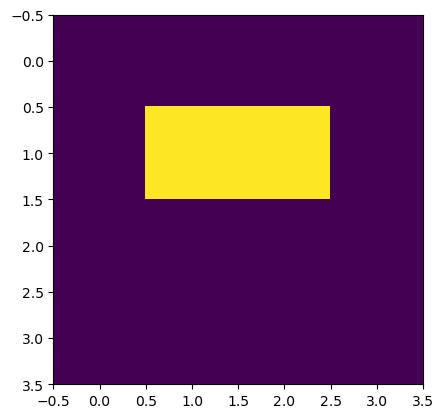

In [17]:
# Version SECUENCIAL del juego de la vida de Conway
#
# Autor: John Sanabria - john.sanabria@correounivalle.edu.co
# Fecha: 2023-02-22

import numpy as np
from time import time

import matplotlib.pyplot as plt 

MAX_X = 4
MAX_Y = 4

#
# Funciones auxiliares usadas para estimar los vecinos de una celda y
# garantizar que los valores del borde no se vayan a sobrepasar
#
def posx(x, max_x = MAX_X):
  return (x + max_x) % max_x

def posy(y, max_y = MAX_Y):
  return (y + max_y) % max_y

def indice(x,y, max_y = MAX_Y):
  return posx(x) * max_y + posy(y) 

#
# Esta funcion se encarga de contar los 8 vecinos de una celda cuales están
# vivos (valor a '1') o cuantos están muertos (valor a '0')
#
#                 |                |
#  (X - 1, Y - 1) | (  X  , Y - 1) | (X + 1, Y - 1)
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1,   Y  ) | (  X  ,   Y  ) | (X + 1,   Y  )
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1, Y + 1) | (  X  , Y + 1) | (X + 1, Y + 1)
#                 |                |

def vecinos(x,y,vector):
  return vector[ indice(x - 1, y - 1) ] + vector[ indice(x - 1, y) ] + vector[ indice(x - 1, y + 1) ] \
  + vector[ indice(x, y - 1) ] + vector[ indice(x, y + 1) ] \
  + vector[ indice(x + 1, y - 1) ] + vector[ indice(x + 1, y) ] + vector[ indice(x + 1, y + 1) ]
#
# Esta función se encarga de recorrer toda las celdas y estimar cuales de ellas 
# vivirán y cuales no 
#
def conway(vector_out, vector_in, low_limit = 0, high_limit = MAX_X):
  for i in range(low_limit,high_limit):
    for j in range(0,MAX_Y):
      n = vecinos(i,j, vector_in)
      valor = 0
      if vector_in[ indice(i,j) ] == 1 and (n == 2 or n == 3):
        valor = 1
      elif vector_in[ indice(i,j) ] == 0 and n == 3:
        valor = 1
      vector_out[ indice(i,j) ] = valor

#
# Función principal
#
if __name__ == '__main__':
  #vector = np.int32( np.random.choice([1,0], MAX_X * MAX_Y, p = [0.50, 0.50]) )
  vector = np.int32([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
  vector_out = np.empty(MAX_X * MAX_Y, dtype = np.int32)
  print(vector)
  t1 = time()
  conway(vector_out, vector)
  t2 = time()
  print(vector_out)
  print(f"El tiempo que tomó calcular {t2 - t1}")
  fig = plt.figure()
  plt.imshow(vector_out.reshape(MAX_X,MAX_Y))
  plt.show()  

### Versión paralelizada (ipyparallel)

Se realizan las respectivas importaciones

In [3]:
#Esto es para visualizar la imágen
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import ipyparallel as parallel

Se definen las respectivas funciones que se encargan de calcular el juego de la vida de Conway

In [4]:
MAX_X = 512
MAX_Y = 512

#
# Funciones auxiliares usadas para estimar los vecinos de una celda y
# garantizar que los valores del borde no se vayan a sobrepasar
#

def posx(x, max_x = MAX_X):
  return (x + max_x) % max_x

def posy(y, max_y = MAX_Y):
  return (y + max_y) % max_y

def indice(x,y, max_y = MAX_Y):
  return posx(x) * max_y + posy(y)

#
# Esta funcion se encarga de contar los 8 vecinos de una celda cuales están
# vivos (valor a '1') o cuantos están muertos (valor a '0')
#
#                 |                |
#  (X - 1, Y - 1) | (  X  , Y - 1) | (X + 1, Y - 1)
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1,   Y  ) | (  X  ,   Y  ) | (X + 1,   Y  )
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1, Y + 1) | (  X  , Y + 1) | (X + 1, Y + 1)
#

def vecinos(x,y):
  return vector[ indice(x - 1, y - 1) ] + vector[ indice(x - 1 , y) ] + vector[ indice(x - 1, y + 1) ] \
  + vector[ indice(x, y - 1) ] + vector[ indice(x, y + 1) ] \
  + vector[ indice(x + 1, y - 1) ] + vector[ indice(x + 1 , y) ] + vector[ indice(x + 1, y + 1) ]

def imprimir_vecinos(x,y):
    print(f"La posicion ({x},{y}) paso de {vector[indice(x,y)]} a {vector_out[indice(x,y)]}")
    print("Sus vecinos eran")
    print(f"{vector[ indice(x - 1, y - 1) ]}, {vector[ indice(x - 1, y) ]}, {vector[ indice(x - 1, y + 1)]}")
    print(f"{vector[ indice(x, y - 1) ]}, X, {vector[ indice(x, y + 1) ]}")
    print(f"{vector[ indice(x + 1, y - 1) ]}, {vector[ indice(x + 1, y) ]}, {vector[ indice(x + 1, y + 1) ]}")
    
#
# Esta función se encarga de recorrer toda las celdas y estimar cuales de ellas 
# vivirán y cuales no 
#
def conway(low_limit = 0, high_limit = MAX_X):
  #print(f"De fila {low_limit} a fila {high_limit}")
  for i in range(low_limit,high_limit):
    for j in range(0,MAX_Y):
      n = vecinos(i,j)
      valor = 0
      if vector[ indice(i,j) ] == 1 and (n == 2 or n == 3):
        valor = 1
      elif vector[ indice(i,j) ] == 0 and n == 3:
        valor = 1
      vector_out[ indice(i,j) ] = valor

## Hora de paralelizar

Se conecta con el respectivo *Client* paralelo

In [5]:
rc = parallel.Client()
all_engines = rc[:]
view = rc.load_balanced_view()

Se proceden a definir los respectivos *namespaces* en cada uno de los *engines* con imports

In [7]:
%%px
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import numpy as np

Procedemos a inicializar cada una de las funciones definidas anteriormente en cada uno de los *engines*

In [8]:
all_engines.push(dict(
    posx=posx,
    posy=posy,
    indice=indice,
    vecinos=vecinos,
    imprimir_vecinos=imprimir_vecinos, #Creo que no es necesario
    
))
print("Terminé")

Terminé


Ahora es posible iterar sobre cada uno de los sub-espacios disponibles para calcular el juego de la vida de Conway

In [9]:
MAX_UNITS = 4 #Numero de engines disponibles
MAX_X = 64 #Dimensión en X de la grilla
MAX_Y = 64 #Dimensión en Y de la grilla

stride = MAX_X / MAX_UNITS
count = 0

#Creación del array que contiene las coordenadas para cada engine
coords = []
for t in range(MAX_UNITS):
    coords.append(count)
    count += stride

#Se guarda el length de coords
coords_len = len(coords)

#Usando el load_balanced_view
amr = view.map_async(conway, [(coords[i], coords[i+1]) for i in range(0,coords_len-1)], ordered=False)